# Título del laboratorio: Análisis de datos desequilibrados utilizando un conjunto de datos del mundo real
## Presentado por : Jhoan Sebastián Medina Jiménez

## Objetivo:
En este laboratorio, utilizaremos un conjunto de datos del mundo real para comprender cómo manejar datos desequilibrados. Utilizaremos técnicas como el sobremuestreo, el submuestreo y la ponderación de clases para equilibrar los datos.

##Conjunto de datos:
Utilizaremos el conjunto de datos "Credit Card Fraud Detection" de Kaggle (https://www.kaggle.com/mlg-ulb/creditcardfraud).


## 1. Cargar el conjunto de datos en Python utilizando Pandas
Se ha descargado el archivo y se lee con pandas


In [2]:
import pandas as pd 
DF = pd.read_csv("/Users/jhoan.medina/Documents/U/T1/creditcard.csv")

In [3]:
DF.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 2. Explorar el conjunto de datos y comprender la distribución de la variable objetivo
La base de datos consta de 31 columas y 284807 filas donde no hay datos faltandes como se puede ver en  la siguiente salida

In [4]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Dado que la variable Time representa el nímero de segundos entre la primer transacción y la transacción n, se elimina pues puede generar ruido en el análisis y no representta información importante para el problema

In [5]:
DF=DF.drop("Time",axis = 1)

### Análisis variables explicativas
Dado que las variables V (menos Value) provienen de un PCA no tiene sentido entrar a ver detalles de las mismas dado que no sabemos la interpretación de las mismas. Se puede observar que Amount (Cantidad de la transacción) no está escalada

In [6]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
DF.describe()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,1.09,1.02,1.00,1.00,0.96,0.92,0.88,0.85,0.84,0.81,0.77,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,-24.59,-4.80,-18.68,-5.79,-19.21,-4.50,-14.13,-25.16,-9.50,-7.21,-54.50,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,-0.54,-0.76,-0.41,-0.65,-0.43,-0.58,-0.47,-0.48,-0.50,-0.46,-0.21,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,-0.09,-0.03,0.14,-0.01,0.05,0.05,0.07,-0.07,-0.00,0.00,-0.06,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,0.45,0.74,0.62,0.66,0.49,0.65,0.52,0.40,0.50,0.46,0.13,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,23.75,12.02,7.85,7.13,10.53,8.88,17.32,9.25,5.04,5.59,39.42,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


Para poder observar la naturaleza de las variables se hace un histograma delas mismas dodne se puede evidenciar no hay aparentemente no hay concentraciones de valores atípcos

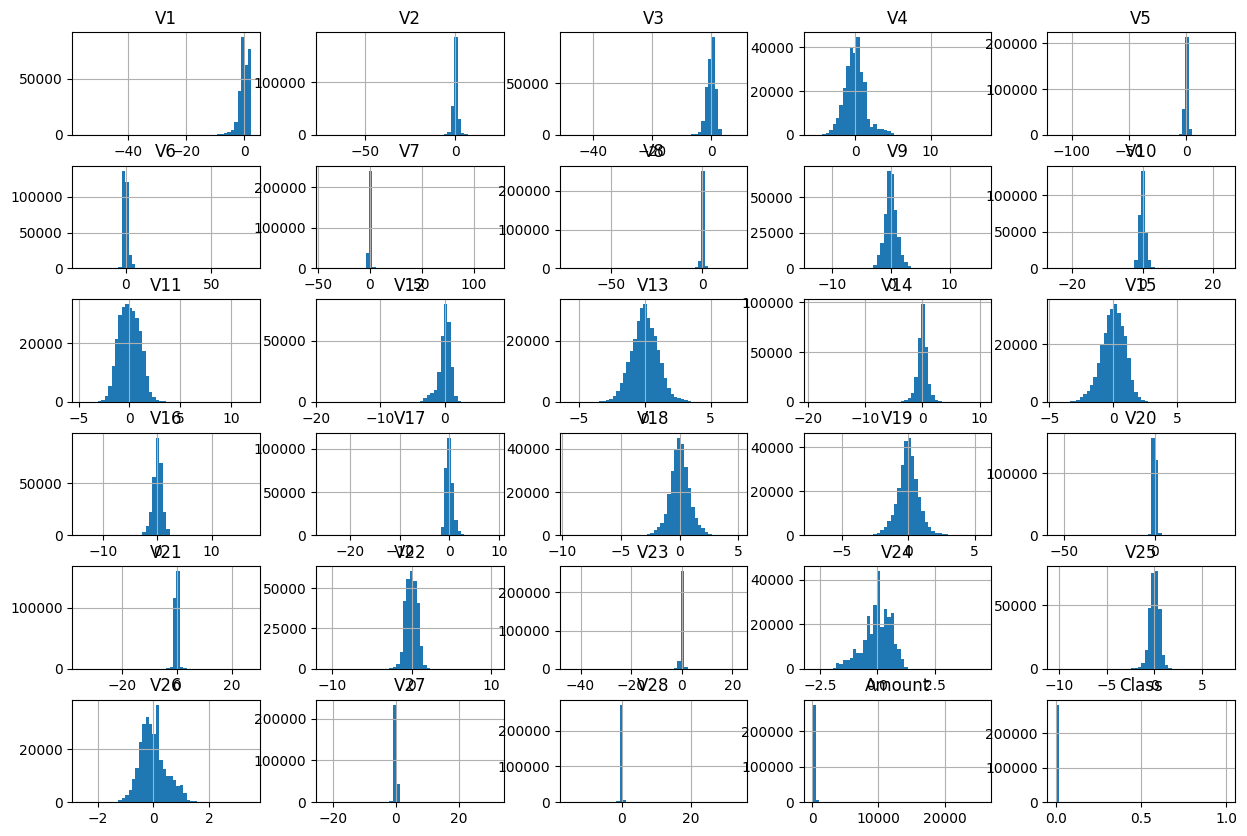

In [58]:
from matplotlib import pyplot as plt
import seaborn as sns
DF.hist(bins=50, figsize=(15,10))
plt.show()

Para poder ver la relación entre las diferentes variables se hace un plot de la matriz de correlación donde se puede ver que las variables V provenientes del PCA no tienen correlación significativa, mientras que para la variable Amount existe una relación "media" con las variables V2,V1,V3,V6,V7 y V20

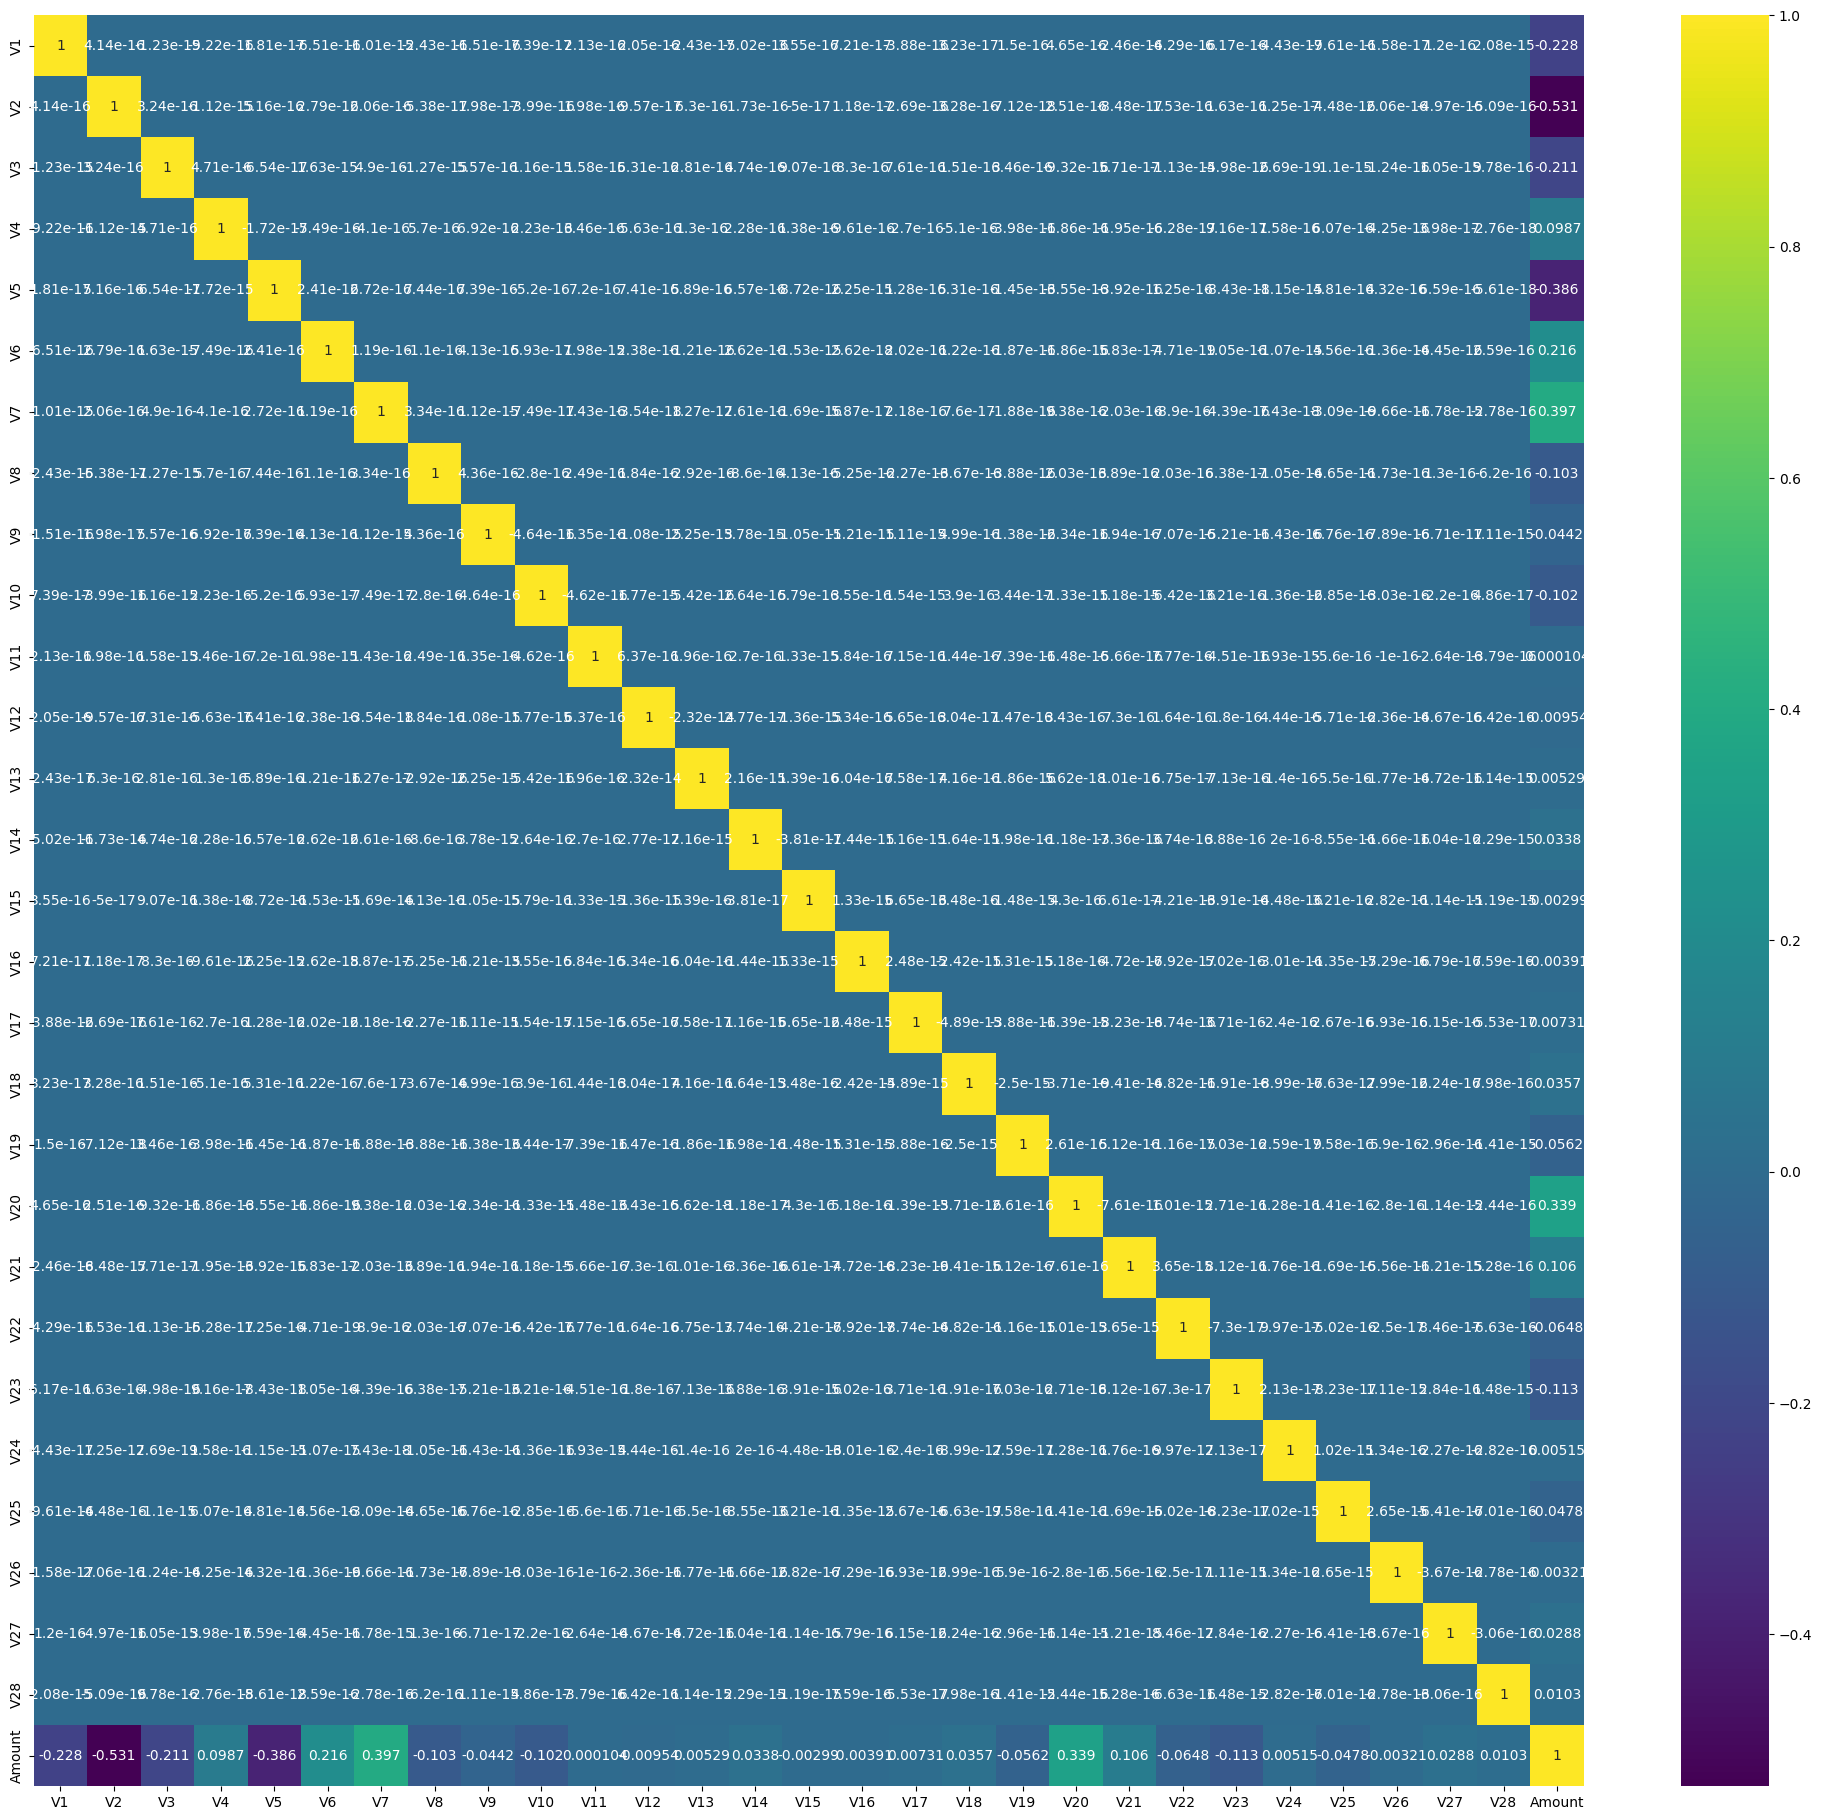

In [62]:
plt.figure(figsize=(25,23))
sns.heatmap(DF.drop("Class",axis = 1).corr(), annot=True, cmap='viridis', fmt='.3g')
plt.show()

### Análisis variable respuesta
Se puede ver que hay 284315 datos para transacciones no fraudulentas mientras que sólo 492 para tansacciones fraudulentas, lo cual supone un problema pues los tados están desbalanceados

In [7]:
DF.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

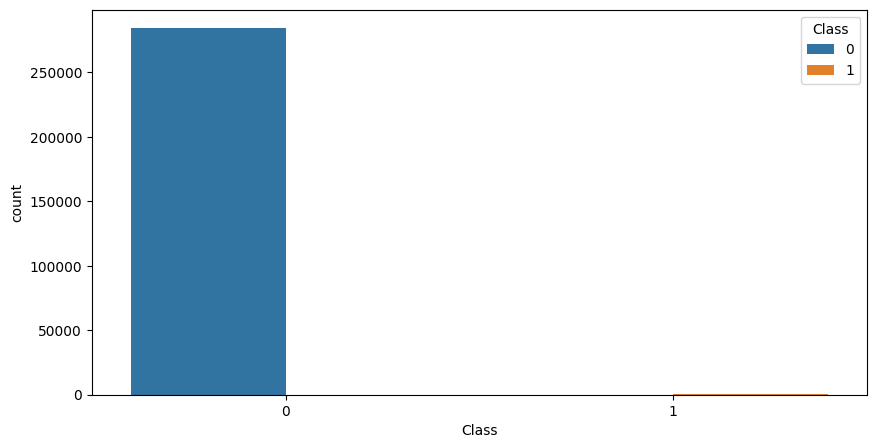

In [57]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Class', hue='Class', data=DF)
plt.show()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,3.84,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-111.56,-0.01
V2,-0.00,2.73,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-219.49,0.01
V3,-0.00,0.00,2.30,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-79.98,-0.01
V4,-0.00,-0.00,-0.00,2.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,34.96,0.01
V5,0.00,0.00,-0.00,-0.00,1.91,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-133.38,-0.01
V6,0.00,0.00,0.00,-0.00,0.00,1.77,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,71.97,-0.00
V7,0.00,-0.00,0.00,-0.00,-0.00,-0.00,1.53,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,122.94,-0.01
V8,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,1.43,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-30.79,0.00
V9,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,1.21,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-12.16,-0.00
V10,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,1.19,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-27.64,-0.01


## 3. Dividir los datos en conjuntos de entrenamiento y de prueba
Se dividen los datos  en train y test con las siguientes condiciones
* El tamaño de los datos de test es 20%
* Se estratifica para que exista un número porporcional de la variable respuesta
* Se fija la semilla

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(DF.drop("Class", axis=1), DF["Class"], test_size=0.2, stratify=DF["Class"], random_state=0)


## 4. Implementar técnicas de sobremuestreo y submuestreo para equilibrar los datos.
Se modifica la función del script de clase para plotear la equilibración de los datos y obtener los conjuntos de datos quilibrados según la metodología que se seleccione

In [71]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, CondensedNearestNeighbour
from imblearn.ensemble import EasyEnsembleClassifier, BalancedBaggingClassifier
from imblearn.combine import SMOTEENN
from imblearn.pipeline import make_pipeline as make_imb_pipeline # avoid confusion
from sklearn.utils import shuffle
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.base import clone
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import numpy as np
X0min, X0max, X1min, X1max = np.min(X_train.iloc[:,0]), np.max(X_train.iloc[:,0]), np.min(X_train.iloc[:,1]), np.max(X_train.iloc[:,1])

samplers = [RandomUnderSampler(),EditedNearestNeighbours(),CondensedNearestNeighbour(),RandomOverSampler(),
           SMOTE(), ADASYN(), EasyEnsembleClassifier(), BalancedBaggingClassifier(), SMOTEENN()]
learners = [LogisticRegression(), SVC(), RandomForestClassifier()]

def plot_imbalance(sampler=RandomUnderSampler(), sampler2=None, learner=LogisticRegression()):
    
    # Appends multiple undersamplings for plotting purposes
    def simulate_bagging(sampler,X_train, y_train):
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train) 
        for i in range(10):
            X_resampled_i, y_resampled_i = sampler.fit_resample(X_train, y_train)
            X_resampled = np.append(X_resampled,X_resampled_i, axis=0)
            y_resampled = np.append(y_resampled,y_resampled_i, axis=0)
        return X_resampled, y_resampled
    
    def build_evaluate(sampler):
        # Build new data
        X_resampled, y_resampled = X_train, y_train
        if isinstance(sampler,EasyEnsembleClassifier):
            X_resampled, y_resampled = simulate_bagging(RandomUnderSampler(),X_train, y_train)
        elif isinstance(sampler,BalancedBaggingClassifier):
            balancer = RandomUnderSampler(sampling_strategy='all', replacement=True)
            X_resampled, y_resampled = simulate_bagging(balancer,X_train, y_train)
        else:
            X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

        # Evaluate
        if isinstance(sampler,EasyEnsembleClassifier):
            pipe = EasyEnsembleClassifier(base_estimator=learner)
        elif isinstance(sampler,BalancedBaggingClassifier):
            pipe = BalancedBaggingClassifier(base_estimator=learner)
        else:
            pipe = make_imb_pipeline(sampler, learner)
        scores = cross_validate(pipe, X_resampled, y_resampled, scoring='roc_auc')['test_score']
        return X_resampled, y_resampled, scores
    
    orig_scores = cross_validate(LogisticRegression(), X_train, y_train, scoring='roc_auc')['test_score']
        
    # Plot
    nr_plots = 2 
    fig, axes = plt.subplots(1, nr_plots, figsize=(nr_plots*3*3, 3*3), subplot_kw={'xticks':(), 'yticks':()})
    axes[0].set_title("Original (AUC: {:.3f})".format(np.mean(orig_scores)))
    try:
        axes[0].scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=plt.cm.tab10(y_train), alpha=.3)
    except:
        axes[0].scatter(X_train[:, 0], X_train[:, 1], c=plt.cm.tab10(y_train), alpha=.3)
 
    X_resampled, y_resampled, scores = build_evaluate(sampler)
    axes[1].set_title("{} (AUC: {:.3f})".format(sampler.__class__.__name__, np.mean(scores)))
    try:
        axes[1].scatter(X_resampled.iloc[:, 0], X_resampled.iloc[:, 1], c=plt.cm.tab10(y_resampled), alpha=.3)
    except:
        axes[1].scatter(X_resampled[:, 0], X_resampled[:, 1], c=plt.cm.tab10(y_resampled), alpha=.3)
    plt.setp(axes[1], xlim=(X0min, X0max), ylim=(X1min, X1max))
        
    plt.tight_layout()
    return X_resampled, y_resampled

Los plots de la equilibración de los datos son los siguietes:
### RandomUnderSampler

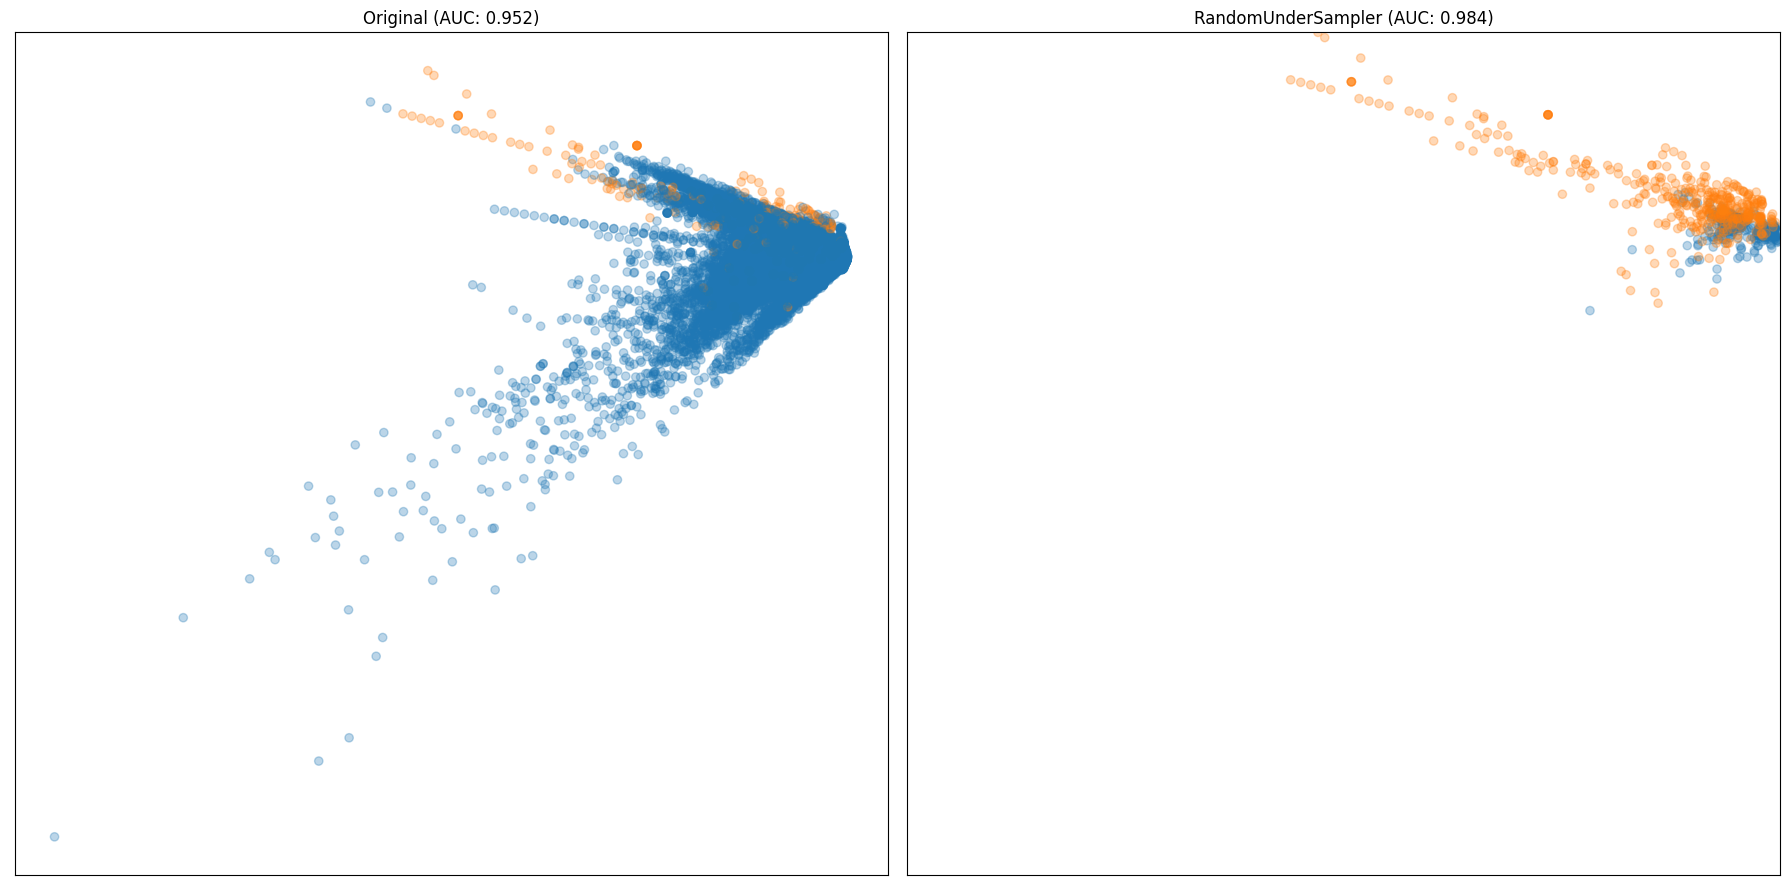

In [72]:
X_resampled_under_sample, y_resampled_under_sample = plot_imbalance(RandomUnderSampler())

### EditedNearestNeighbours

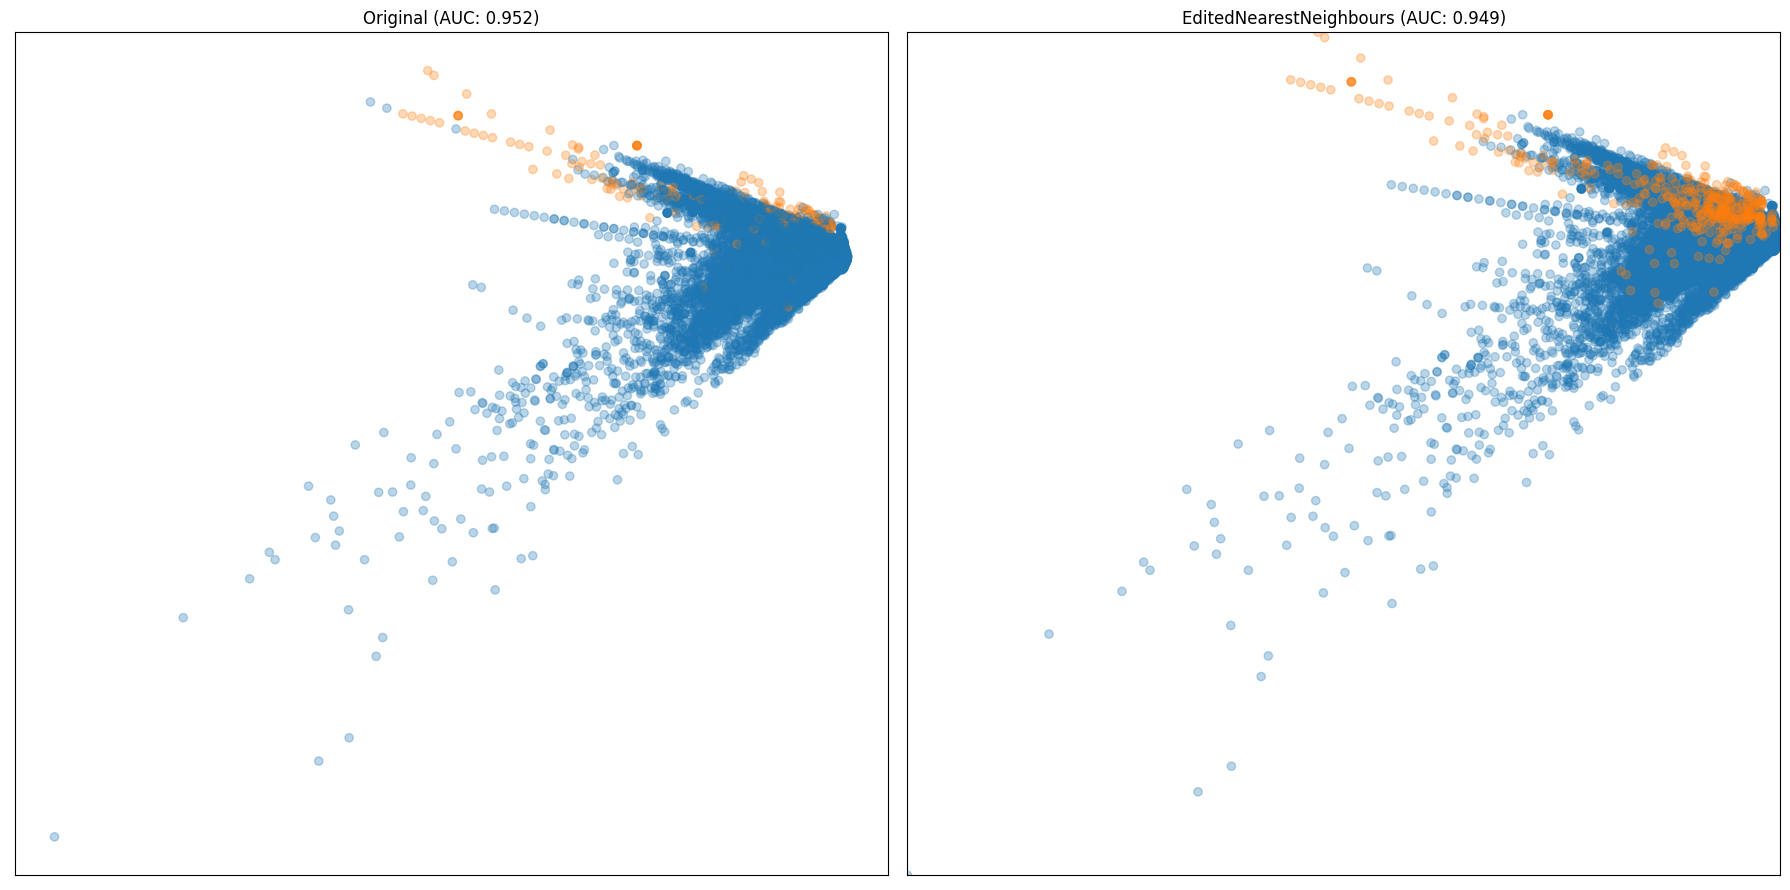

In [74]:
X_resampled_EditedNearestNeighbours, y_resampled_EditedNearestNeighbourse =  plot_imbalance(EditedNearestNeighbours())

### RandomOverSampler

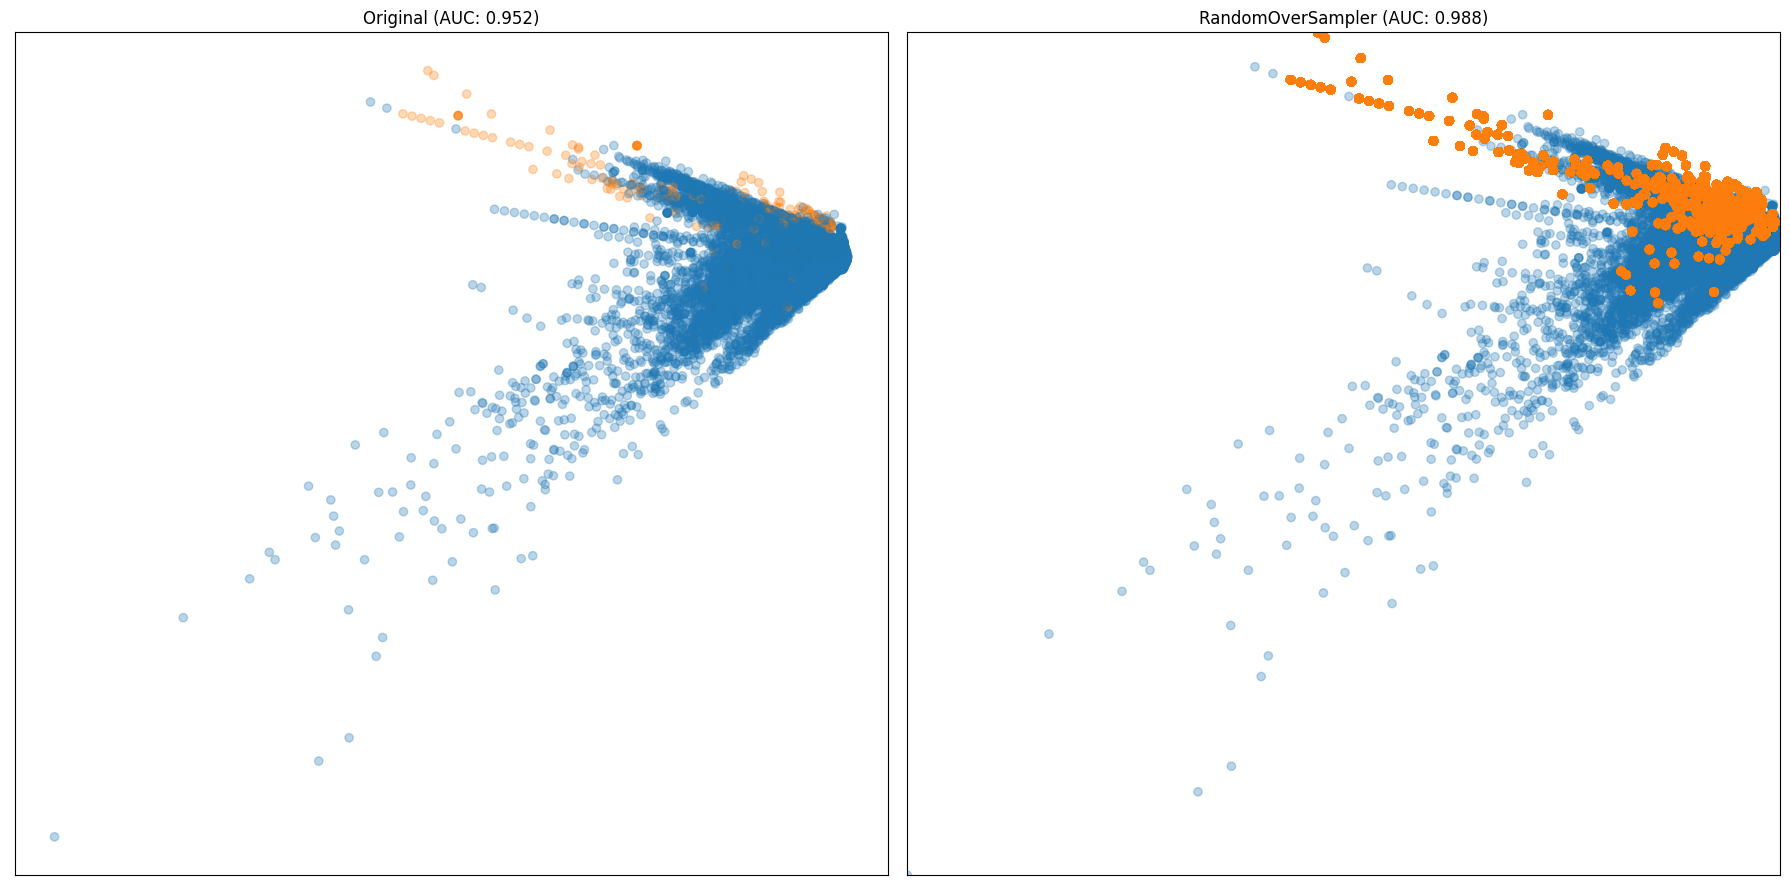

In [76]:
X_resampled_RandomOverSampler, y_resampled_RandomOverSampler = plot_imbalance(RandomOverSampler())

### SMOTE

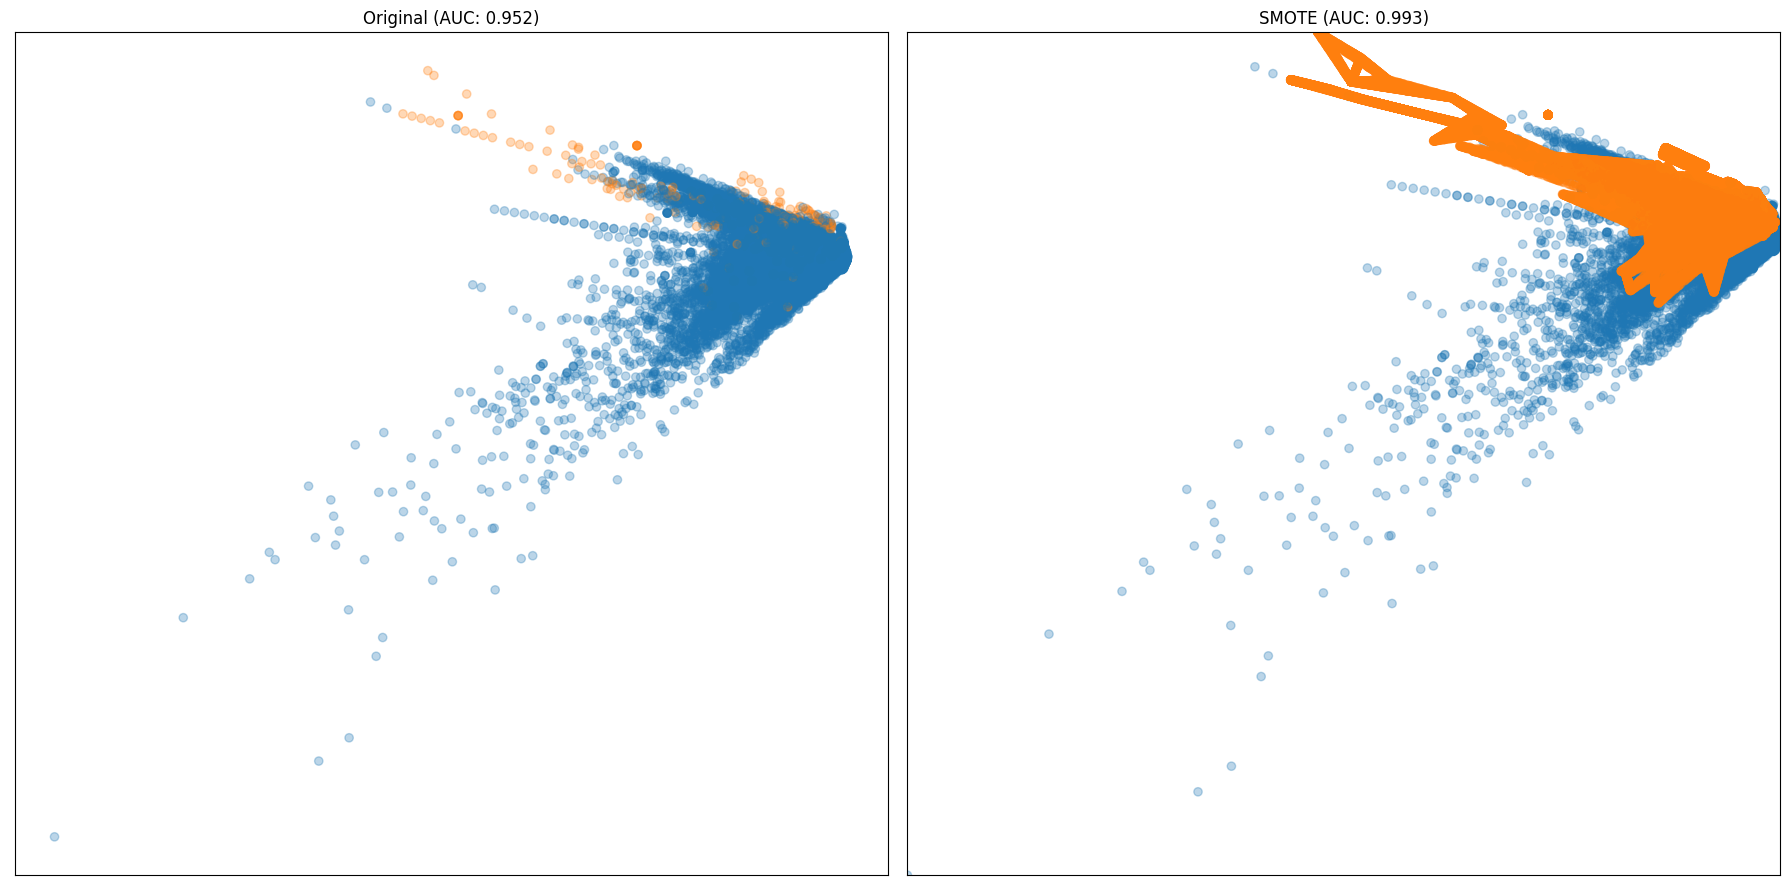

In [77]:
X_resampled_SMOTE, y_resampled_SMOTE = plot_imbalance(SMOTE())

### ADASYN

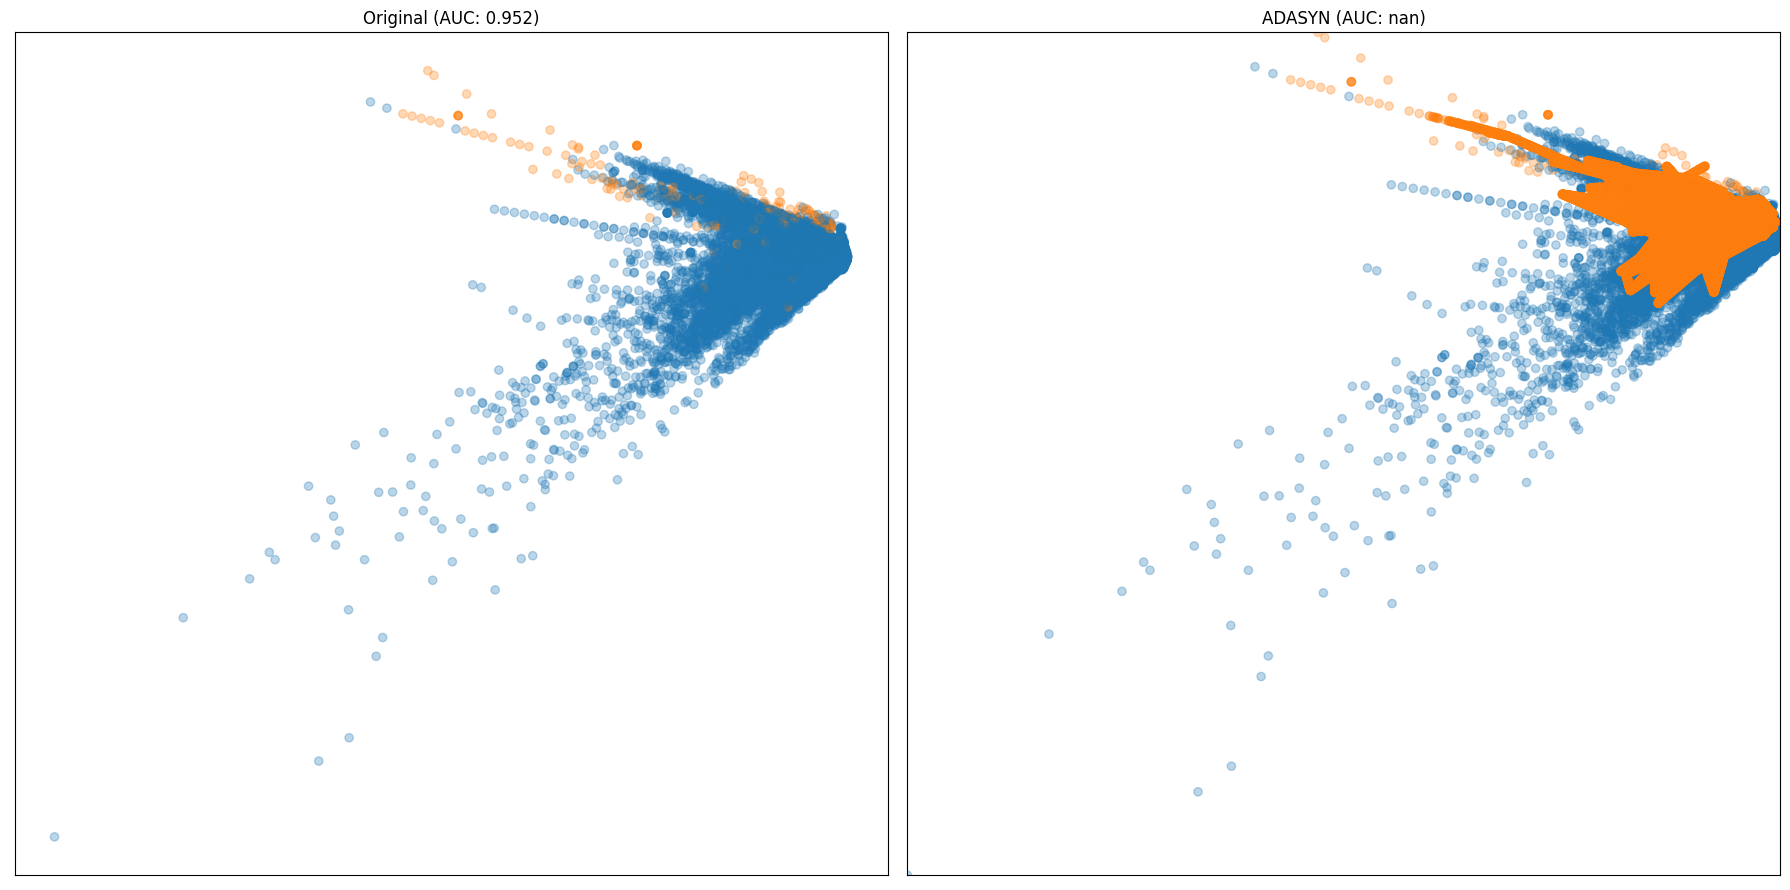

In [78]:
X_resampled_ADASYN, y_resampled_ADASYN = plot_imbalance( ADASYN())

### SMOTEENN

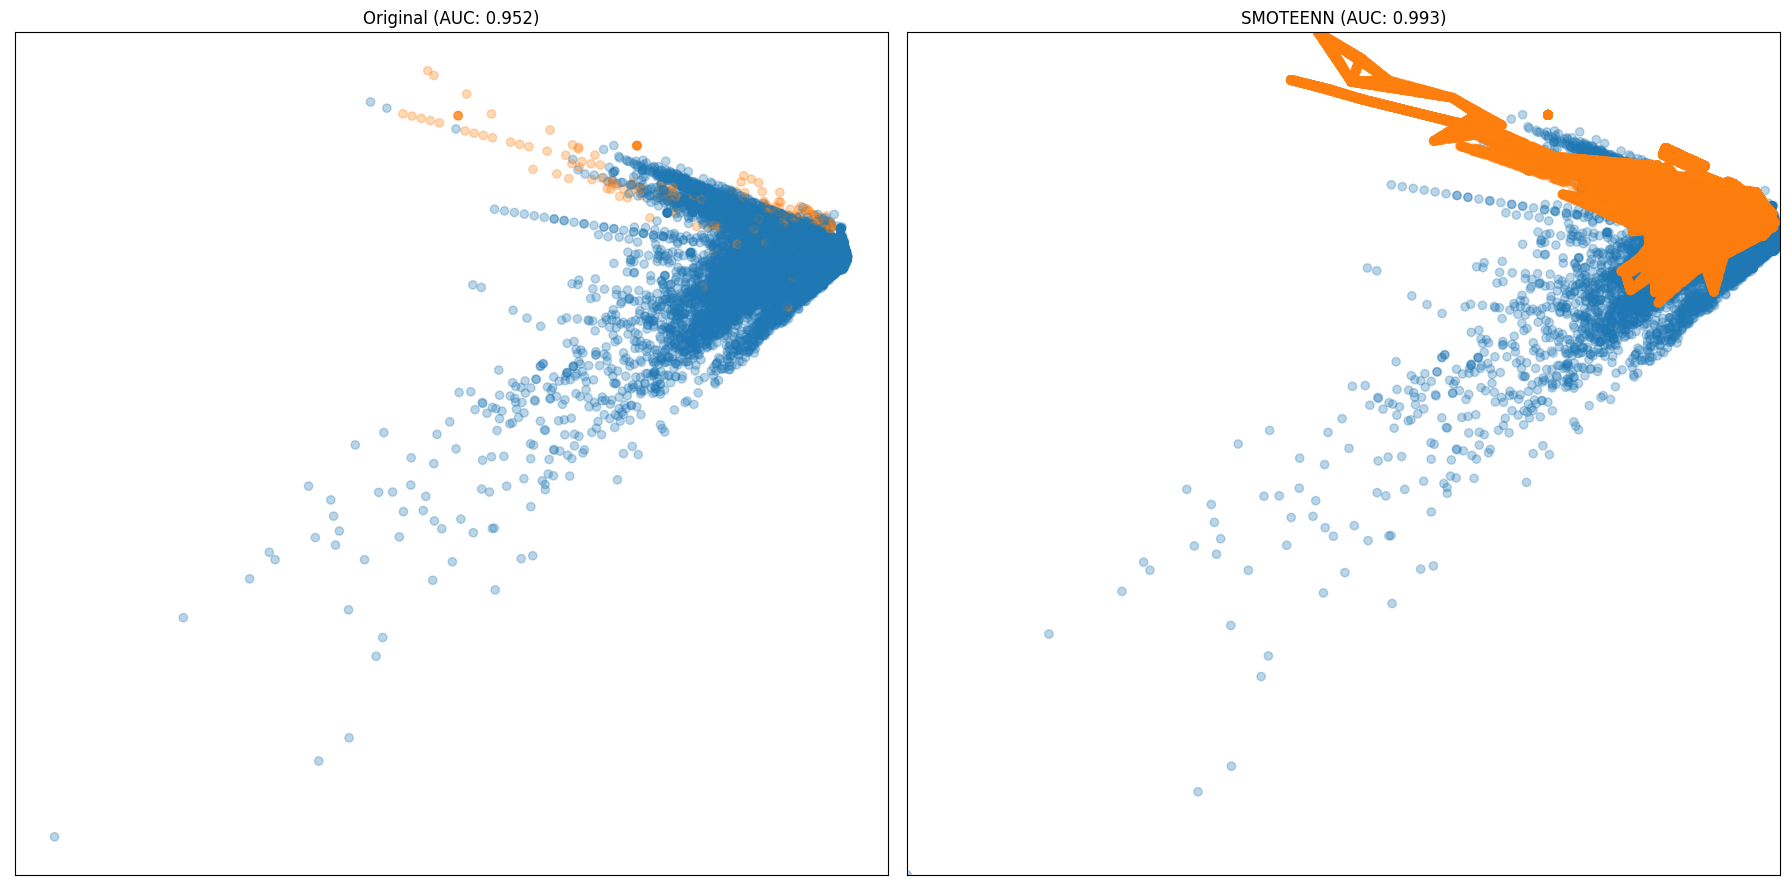

In [79]:
X_resampled_SMOTEENN, y_resampled_SMOTEENN = plot_imbalance(SMOTEENN())

### EasyEnsembleClassifier

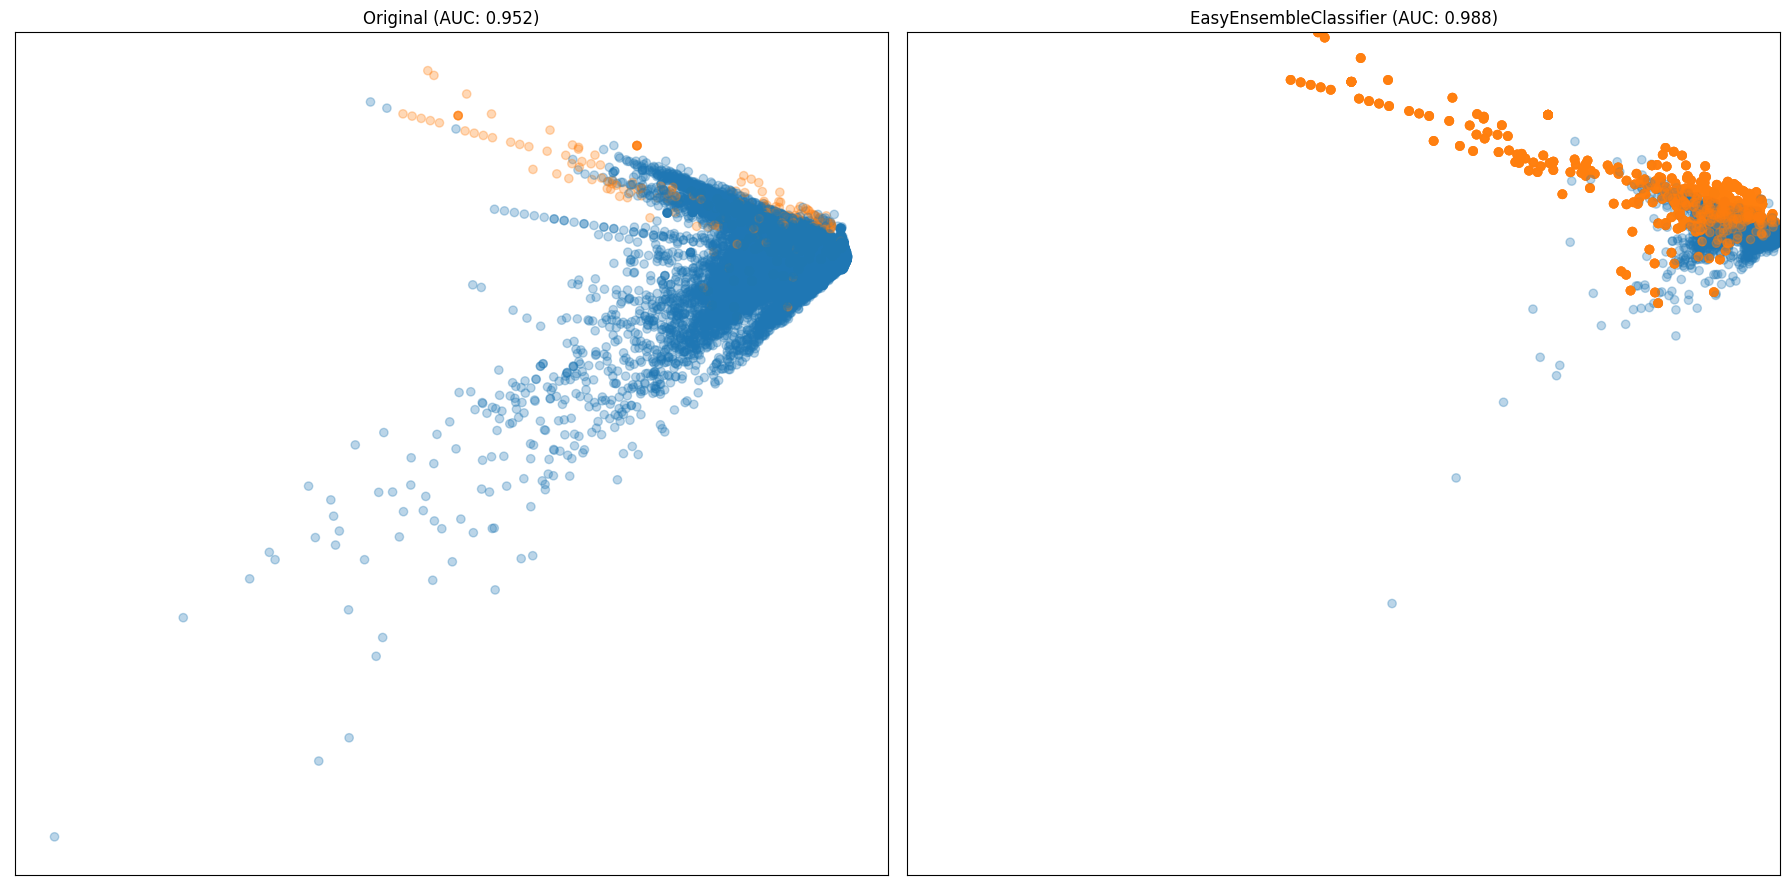

In [80]:
X_resampled_EasyEnsembleClassifier, y_resampled_EasyEnsembleClassifier =  plot_imbalance(EasyEnsembleClassifier()) 

### BalancedBaggingClassifier

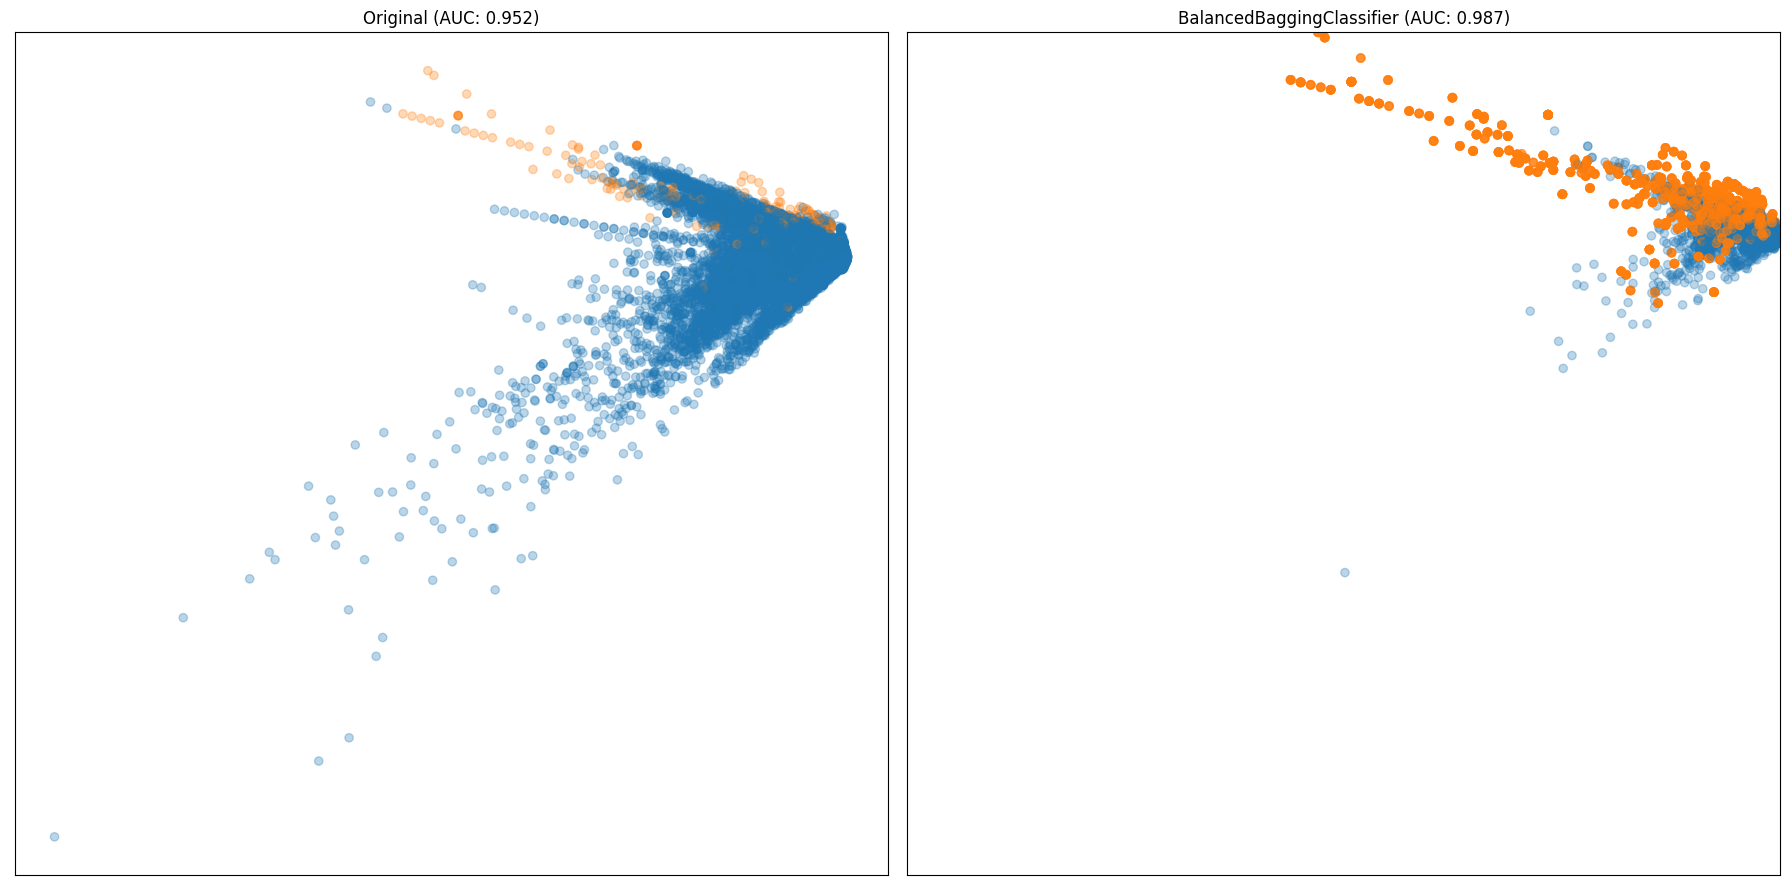

In [81]:
X_resampled_BalancedBaggingClassifier, y_resampled_BalancedBaggingClassifier = plot_imbalance(BalancedBaggingClassifier()) 

Se puede ver que los métodos con mejor AUC son el SMOTE y SMOOTENN pero crea datos que parecen ser muy "ficticios" mientras que los demás métodos demuestran simular comportamientos más naturales. Por tanto se ajustará un modelo para cada una de las metodologías para seleccionar la mejor opción

## 5. Entrene un modelo de aprendizaje automático con los datos equilibrados y evalúe su rendimiento.


In [95]:
balancing_methods = {'under_sample' : (X_resampled_under_sample,y_resampled_under_sample),
                     'EditedNearestNeighbours' : (X_resampled_EditedNearestNeighbours,y_resampled_EditedNearestNeighbourse),
                     'RandomOverSampler' : (X_resampled_RandomOverSampler,y_resampled_RandomOverSampler),
                     'SMOTE' : (X_resampled_SMOTE,y_resampled_SMOTE),
                     'ADASYN' : (X_resampled_ADASYN,y_resampled_ADASYN),
                     'SMOTEENN' : (X_resampled_SMOTEENN,y_resampled_SMOTEENN),
                     'EasyEnsembleClassifier' : (X_resampled_EasyEnsembleClassifier,y_resampled_EasyEnsembleClassifier)}

Se hace un ajuste de un medelo random forest clasifier se hace un escalado de los datos  y se itera para todos los conjuntos de datos seleccionados

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

def class_iterarion(X_train,y_train,X_test,y_test):
    lr = RandomForestClassifier()
    rs = StandardScaler()

    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)
    test_presicion = precision_score(y_test, y_pred)


    return test_acc,test_recall,test_presicion



In [109]:
method = []
acc = []
recall = []
presicion = []
for i in list(balancing_methods.keys()):
    print(i)
    X_train_iter = balancing_methods[i][0]
    y_train_iter = balancing_methods[i][1]
    test_acc,test_recall,test_presicion = class_iterarion (X_train_iter,y_train_iter,X_test,y_test)
    method.append(i)
    acc.append(test_acc)
    recall.append(test_recall)
    presicion.append(test_presicion)

under_sample
EditedNearestNeighbours
RandomOverSampler
SMOTE
ADASYN
SMOTEENN
EasyEnsembleClassifier


Los resultados son los siguientes

In [110]:
pd.DataFrame(list(zip(method, acc,recall,presicion)), columns =['method', 'accuracy','recall','precision']) 

,method,accuracy,recall,precision
0,under_sample,0.97,0.87,0.04
1,EditedNearestNeighbours,1.00,0.73,0.92
2,RandomOverSampler,1.00,0.78,0.96
3,SMOTE,1.00,0.81,0.91
4,ADASYN,1.00,0.80,0.93
5,SMOTEENN,1.00,0.81,0.87
6,EasyEnsembleClassifier,1.00,0.85,0.51


Dado que nuentro interés está en detectar realmente las transacciones fraudulentas se procede a medir el performance del modelo con el recall 
Se tiene que :
* Para under sampling la precisión es muy mala
* para los métodos  SMOTE, ADASYN y SMOOTEENN se tienen los mejores comportamientos en la predicción dado que el recall y la precisión son los mejores
* Las demás metodologías tiene comportamientos no tan óptimos

6. Comparar el rendimiento del modelo entrenado en los datos equilibrados con el rendimiento del modelo entrenado en los datos originales desequilibrados.


In [111]:
class_iterarion (X_train,y_train,X_test,y_test)

(0.9992451107756047, 0.6836734693877551, 0.8481012658227848)

Se puede ver que con los datos sin modificar el recall es muy bajo y podría hacer que no se clasifique como fraude lo que en realidad es fraude y este es el error más grave para el modelo, por tanto el balanceo de los datos es importante y que las metodologías ganadoras son SMOTE ADASYN y SMOTEEN